In [4]:
import sys
import os
# TEMPORARY FIX for KMP_DUPLICATE_LIB_OK error
os.environ['KMP_DUPLICATE_LIB_OK']='True'
current_dir = os.getcwd()
ROOT = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(ROOT)

from modules.solver.origami import RigidFoldableStructure
from modules.solver.kinematics import Kinematics
from modules.solver.util import pattern_visualizer, load_rfs_artifact_npz

In [5]:
RES_info = load_rfs_artifact_npz("../data/import/RES/square_pop_up_kirigami.npz")
RES_pattern = RigidFoldableStructure(
    vert=RES_info["V"], edge=RES_info["E"], face=RES_info["F"], connection = RES_info["C"], base = [0,0])

[*] Loaded artifact <- ../data/import/RES/square_pop_up_kirigami.npz

                         Inter-layer Hinge Connection Metadata Summary                         
Hinge Location     | Facet A         | Facet B         | Structural Source (Layer: V -> V)
-----------------------------------------------------------------------------------------------
Layer 2, Idx 0     | (0, 0)          | (1, 0)          | Source-Layer 0: Vertex 1 -> 0
Layer 2, Idx 1     | (0, 0)          | (1, 4)          | Source-Layer 0: Vertex 3 -> 2
Layer 2, Idx 2     | (0, 0)          | (1, 8)          | Source-Layer 0: Vertex 5 -> 4
Layer 2, Idx 3     | (0, 0)          | (1, 12)         | Source-Layer 0: Vertex 7 -> 6

[*] Sheet Signs Generated: [1, 1]


(<Figure size 1000x800 with 1 Axes>,
 <Axes3D: title={'center': 'RFS Pattern Visualization'}, xlabel='X', ylabel='Y', zlabel='Z'>)

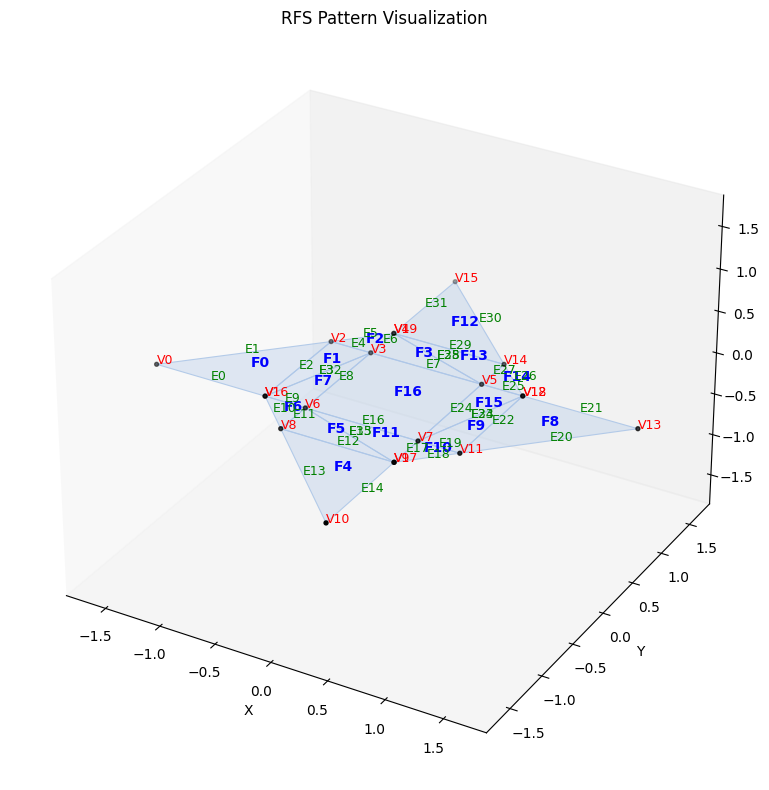

In [6]:
pattern_visualizer(RES_pattern, sheets = [1], show_vertices = True, show_edges = True, show_faces = True)

In [7]:
kinematics = Kinematics(RES_pattern, k_raw = RES_info["k_stiffness_raw"], 
                        theta_init_raw = RES_info["theta_init_raw"], 
                        theta_equil_raw = RES_info["theta_neutral_raw"], 
                        face_colors = RES_info["face_colors"], reference_frame= RES_info["reference_frame"])


angle_history_raw = kinematics._find_equilibrium_trajectory()

Processed iteration 100/5000, c = 1.040e-09, max_diff(deg) = 16.89, dof = 2
Converged to equilibrium angles.


Processing 101 iterations and interpolating to 200 frames.
Exporting results... | fps: 30, play_speed: 1.0


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


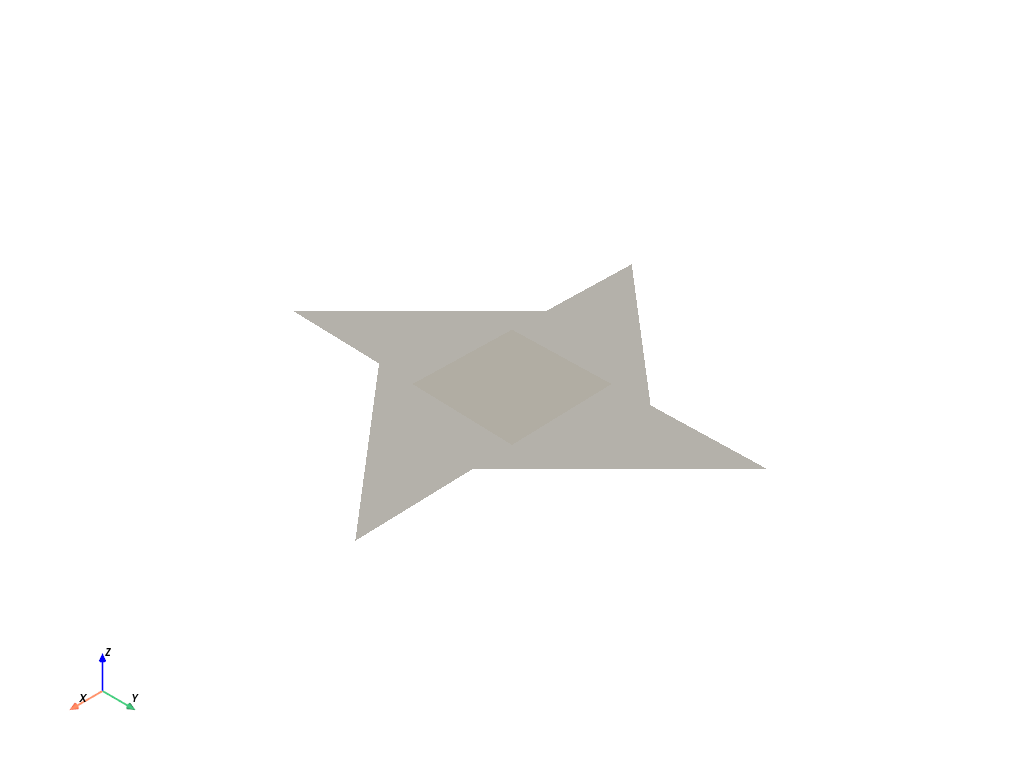

Done.


In [8]:
ply_path = '../data/visualization_result/Square_Pop_Up/square_pop_up_kirigami.vtp'
npy_path = '../data/visualization_result/Square_Pop_Up/square_pop_up_kirigami.npy'
gif_path = None # '../data/visualization_result/Square_Pop_Up/square_pop_up_kirigami.gif'
vtk_path = None # '../data/visualization_result/Square_Pop_Up/square_pop_up_vtk'

kinematics.export_trajectory(ply_path=ply_path, npy_path=npy_path, gif_path=gif_path, vtk_path = vtk_path, show_base=False)